# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\jgaur\python_ml\EDA\titanic.csv')

In [3]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


# Exploratory Data Analysis
## Let's begin some exploratory data analysis! We'll start by checking out missing data.

## Missing Data
### We can use seaborn to create a simple heatmap to see where we are missing data

In [4]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

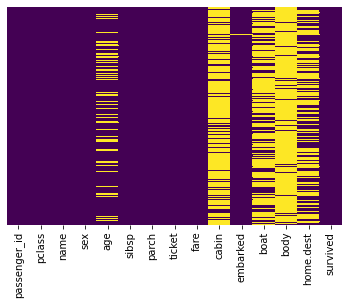

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

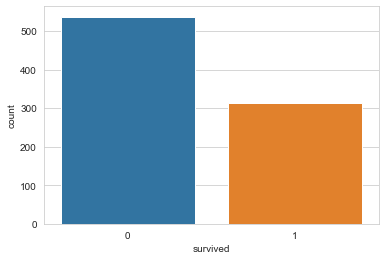

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='survived', data=df)

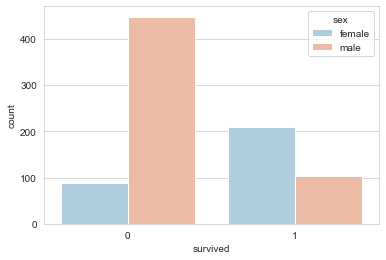

In [8]:
sns.countplot(x='survived', hue='sex', data=df, palette='RdBu_r')

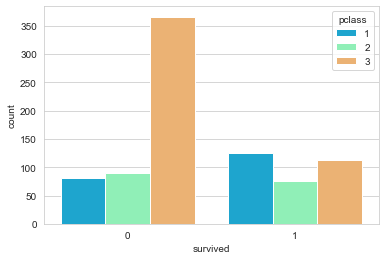

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue='pclass', data=df, palette='rainbow')

In [10]:
df['age'].isnull().sum()

174

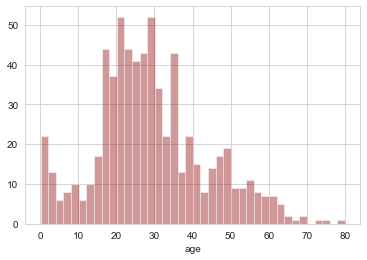

In [11]:
sns.distplot(df['age'].dropna(), kde=False, color='darkred', bins=40)

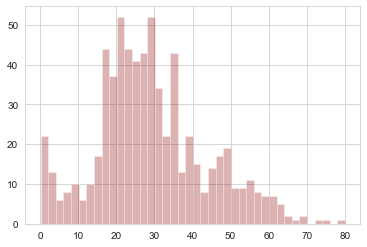

In [12]:
df['age'].hist(bins=40, color='darkred', alpha=0.3)

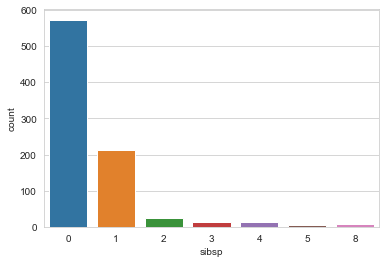

In [13]:
sns.countplot(x='sibsp', data=df)

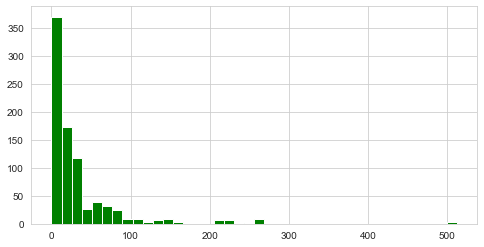

In [14]:
df['fare'].hist(color='green', bins=40, figsize=(8, 4))

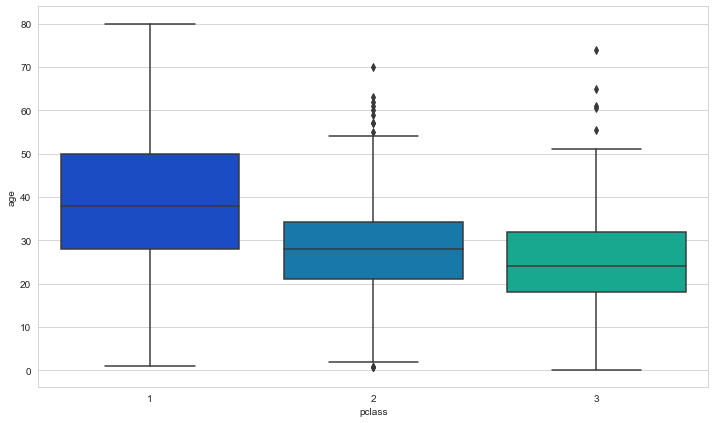

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass', y='age', data=df, palette='winter')

In [16]:
def impute_age(x):
    age = x[0]
    pclass = x[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        
        elif pclass == 2:
            return 29
        
        else:
            return 24
    
    return age

In [17]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis=1)

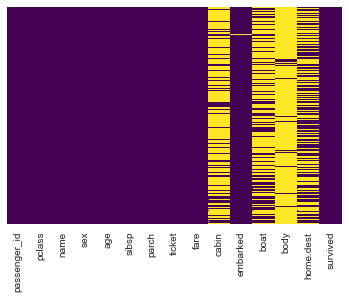

In [18]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
df.drop('cabin', axis=1, inplace=True)

In [21]:
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)

In [22]:
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",0,24.0,0,0,335432,7.7333,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",1,38.0,0,0,315089,8.6625,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",0,30.0,1,1,345773,24.1500,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",0,54.0,1,3,29105,23.0000,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",1,40.0,0,0,28221,13.0000,S,NaN,NaN,"Barre, Co Washington, VT",0
